In [57]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Get The Data

In [58]:
columns = ['question', 'answer']

df = pd.read_csv('dialogs.txt', sep='\t', names=columns)

df.head(10)

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
5,i've been good. i'm in school right now.,what school do you go to?
6,what school do you go to?,i go to pcc.
7,i go to pcc.,do you like it there?
8,do you like it there?,it's okay. it's a really big campus.
9,it's okay. it's a really big campus.,good luck with school.


# EDA

In [59]:
print("Data types of columns:")
print(df.dtypes)
print("-------")
print("Shape of the dataset:")
print(df.shape)
print("-------")
print("Missing values:")
print(df.isnull().sum())


Data types of columns:
question    object
answer      object
dtype: object
-------
Shape of the dataset:
(3725, 2)
-------
Missing values:
question    0
answer      0
dtype: int64


#### comparison of question and answer length

In [60]:
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

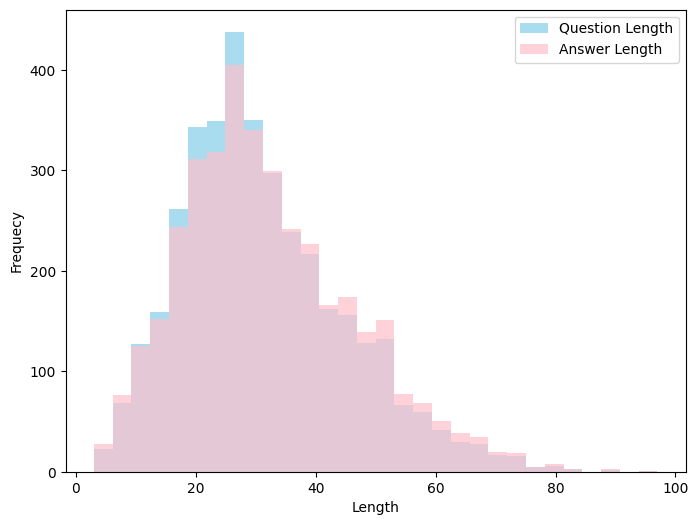

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(df['question_length'], bins=30, alpha=0.7, color='skyblue', label='Question Length')
plt.hist(df['answer_length'], bins=30, alpha=0.7, color='pink', label='Answer Length')
plt.xlabel('Length')
plt.ylabel('Frequecy')
plt.legend()
plt.show()

#### word count

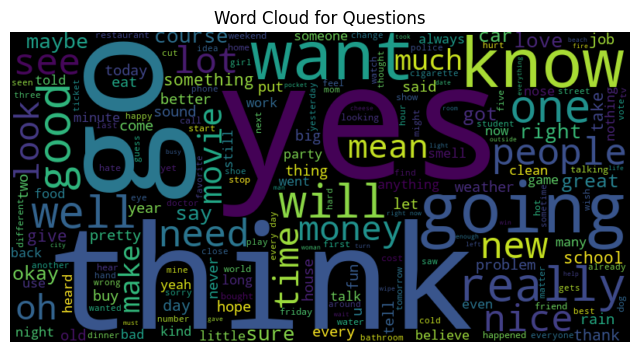

In [62]:
question_words = ' '.join(df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(question_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

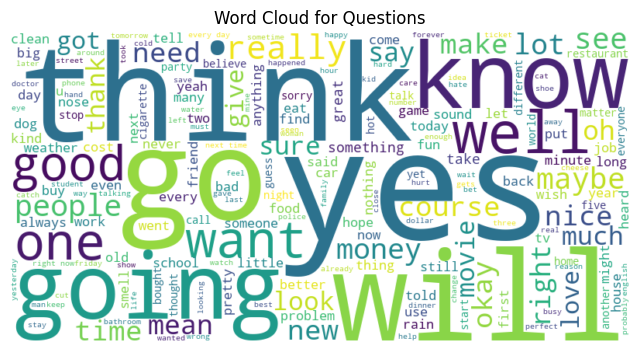

In [63]:
answer_words = ' '.join(df['answer'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(answer_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

# Processing Data

In [64]:
new_dialogue_data = [
    ["Hi", "Hello"],
    ["Hello", "Hi"],
    ["How are you?", "I'm good, thanks for asking. How about you?"],
    ["I'm good, thanks for asking. How about you?", "I'm doing well too."],
    ["I'm doing well too.", "That's great to hear. What have you been up to lately?"],
    ["That's great to hear. What have you been up to lately?", "Not much, just working and spending time with family."],
    ["Not much, just working and spending time with family.", "That sounds nice. Have you watched any good movies recently?"],
    ["Yeah, I saw a really good one last weekend.", "It was a thriller, right? I heard good things about it."],
    ["Yes, it was.", "Do you want to watch it together sometime?"],
    ["Sure, that sounds like a plan.", "Awesome! Let's plan it for this weekend."],
    ["Sounds good to me.", "Alright then, it's a plan. What time works for you?"],
    ["How about Saturday evening?", "Perfect! Saturday evening it is. I'll book the tickets."],
    ["Great! Looking forward to it.", "Me too. It'll be fun."]
]
new_df = pd.DataFrame(new_dialogue_data, columns=columns)

df = pd.concat([df, new_df], ignore_index=True)

In [65]:
def preprocess_text(text):
    text = text.lower()
    return text

In [66]:
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Train The Model

In [68]:
X_train = preprocessed_df['question']
y_train = preprocessed_df['answer']

In [69]:
Pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

Pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [70]:
Pipe.predict(['Where did you go?'])[0]

'we went to a nice restaurant.'

In [71]:
import joblib
joblib.dump(Pipe, 'pipeline_model.pkl')


['pipeline_model.pkl']